In [9]:
!pip install plotly
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install seaborn

In [10]:
import sklearn as sk
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns

In [11]:
# Loading Datasets
data = pd.read_csv('./Crime_Data_from_2020_to_Present.csv', usecols=['DR_NO','AREA NAME' ,'Date Rptd', 'DATE OCC', 'TIME OCC', 'LOCATION', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Weapon Desc', 'Premis Desc', 'LAT', 'LON'], header=0)
data = data[data['DATE OCC'].str.contains('2024')]
data.dropna(inplace=True)



encoded = pd.DataFrame()

data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,Weapon Desc,LOCATION,LAT,LON
877323,242108414,04/25/2024 12:00:00 AM,04/25/2024 12:00:00 AM,1600,Topanga,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,M,STREET,HAND GUN,21400 SHERMAN WY,34.2010,-118.5977
877324,240604934,01/21/2024 12:00:00 AM,01/21/2024 12:00:00 AM,1510,Hollywood,BATTERY - SIMPLE ASSAULT,22,F,MISSIONS/SHELTERS,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1300 N WESTERN AV,34.0944,-118.3125
877326,242107187,03/22/2024 12:00:00 AM,03/22/2024 12:00:00 AM,1815,Topanga,BATTERY - SIMPLE ASSAULT,58,M,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",22000 GILMORE ST,34.1876,-118.6070
877328,240607797,03/25/2024 12:00:00 AM,03/25/2024 12:00:00 AM,1422,Hollywood,OTHER ASSAULT,50,M,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",UNKNOWN WEAPON/OTHER WEAPON,1900 N VAN NESS AV,34.1053,-118.3159
877333,240904953,01/28/2024 12:00:00 AM,01/26/2024 12:00:00 AM,1808,Van Nuys,BATTERY - SIMPLE ASSAULT,26,F,RESTAURANT/FAST FOOD,UNKNOWN WEAPON/OTHER WEAPON,14800 VICTORY BL,34.1867,-118.4553


In [12]:
gender_counts = data['Vict Sex'].value_counts()
gender_counts

Vict Sex
M    11671
F    10362
X     1736
H        1
Name: count, dtype: int64

In [13]:
data.describe()

,DR_NO,TIME OCC,Vict Age,LAT,LON
count,2.377000e+04,23770.000000,23770.000000,23770.000000,23770.000000
mean,2.411378e+08,1343.097308,34.032141,34.060811,-118.353740
std,7.409562e+05,666.805624,18.326756,0.118093,0.099573
min,2.303006e+08,1.000000,0.000000,33.705900,-118.667300
25%,2.406048e+08,900.000000,23.000000,33.984325,-118.416600
50%,2.412082e+08,1430.000000,33.000000,34.047300,-118.320600
75%,2.416069e+08,1900.000000,46.000000,34.166700,-118.278400
max,2.520041e+08,2359.000000,99.000000,34.327400,-118.161100


In [14]:
# Time Conversion

# Combine DATE OCC and TIME OCC into a single datetime column
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
#data['DATE OCC'] = pd.to_datetime(data['DATE OCC'] + ' ' + data['TIME OCC'], format='%Y-%m-%d %M:%S')
# Convert the datetime column to Unix timestamps
encoded['UNIX_TIMESTAMP'] = data['DATE OCC'].apply(lambda x: x.timestamp())
encoded['TIME OCC'] = data['TIME OCC'].copy()
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,Weapon Desc,LOCATION,LAT,LON
877323,242108414,04/25/2024 12:00:00 AM,2024-04-25,1600,Topanga,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,M,STREET,HAND GUN,21400 SHERMAN WY,34.2010,-118.5977
877324,240604934,01/21/2024 12:00:00 AM,2024-01-21,1510,Hollywood,BATTERY - SIMPLE ASSAULT,22,F,MISSIONS/SHELTERS,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1300 N WESTERN AV,34.0944,-118.3125
877326,242107187,03/22/2024 12:00:00 AM,2024-03-22,1815,Topanga,BATTERY - SIMPLE ASSAULT,58,M,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",22000 GILMORE ST,34.1876,-118.6070
877328,240607797,03/25/2024 12:00:00 AM,2024-03-25,1422,Hollywood,OTHER ASSAULT,50,M,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",UNKNOWN WEAPON/OTHER WEAPON,1900 N VAN NESS AV,34.1053,-118.3159
877333,240904953,01/28/2024 12:00:00 AM,2024-01-26,1808,Van Nuys,BATTERY - SIMPLE ASSAULT,26,F,RESTAURANT/FAST FOOD,UNKNOWN WEAPON/OTHER WEAPON,14800 VICTORY BL,34.1867,-118.4553
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004884,241604405,01/14/2024 12:00:00 AM,2024-01-13,720,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",36,M,STREET,OTHER KNIFE,8700 LANKERSHIM BL,34.2271,-118.3878
1004886,242004546,01/16/2024 12:00:00 AM,2024-01-16,1510,Olympic,BATTERY - SIMPLE ASSAULT,80,F,BUS STOP,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",HOBART BL,34.0690,-118.3054
1004890,241414280,10/16/2024 12:00:00 AM,2024-10-16,1546,Pacific,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",46,M,VIDEO RENTAL STORE,UNKNOWN WEAPON/OTHER WEAPON,5200 W 98TH ST,33.9469,-118.3703
1004892,240104953,01/15/2024 12:00:00 AM,2024-01-15,100,Central,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,X,HOTEL,UNKNOWN WEAPON/OTHER WEAPON,1300 W SUNSET BL,34.0685,-118.2460


# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the 'Crm Cd Desc' column
label_encoder.fit(data['Crm Cd Desc'])
# Transform the 'Crm Cd Desc' column
encoded['Crm Cd Desc'] = label_encoder.transform(data['Crm Cd Desc'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['AREA NAME'])
# Transform the 'AREA NAME' column
encoded['AREA NAME'] = label_encoder.transform(data['AREA NAME'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['Vict Sex'])
# Transform the 'AREA NAME' column
encoded['Vict Sex'] = label_encoder.transform(data['Vict Sex'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['Premis Desc'])
# Transform the 'AREA NAME' column
encoded['Premis Desc'] = label_encoder.transform(data['Premis Desc'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['Weapon Desc'])
# Transform the 'AREA NAME' column
encoded['Weapon Desc'] = label_encoder.transform(data['Weapon Desc'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['LOCATION'])
# Transform the 'AREA NAME' column
encoded['LOCATION'] = label_encoder.transform(data['LOCATION'])


encoded.to_csv('encoded.csv', index=True)
data.to_csv('data.csv', index=True)
encoded


,UNIX_TIMESTAMP,TIME OCC,Crm Cd Desc,AREA NAME,Vict Sex,Premis Desc,Weapon Desc,LOCATION
877323,1.714003e+09,1600,71,16,2,206,25,4212
877324,1.705795e+09,1510,4,6,0,88,59,1803
877326,1.711066e+09,1815,4,16,2,195,59,4328
877328,1.711325e+09,1422,45,6,2,155,69,3572
877333,1.706227e+09,1808,4,17,0,189,69,2466
...,...,...,...,...,...,...,...,...
1004884,1.705104e+09,720,2,3,2,206,38,8918
1004886,1.705363e+09,1510,4,11,0,21,59,9995
1004890,1.729037e+09,1546,78,12,2,232,69,6557
1004892,1.705277e+09,100,85,1,3,72,69,1886


                UNIX_TIMESTAMP  TIME OCC  Crm Cd Desc  AREA NAME  Vict Sex  \
UNIX_TIMESTAMP        1.000000 -0.009685     0.169872   0.021457  0.043033   
TIME OCC             -0.009685  1.000000    -0.026836   0.005878  0.009605   
Crm Cd Desc           0.169872 -0.026836     1.000000   0.022025  0.004997   
AREA NAME             0.021457  0.005878     0.022025   1.000000  0.008140   
Vict Sex              0.043033  0.009605     0.004997   0.008140  1.000000   
Premis Desc           0.062746  0.010107     0.039510  -0.010644 -0.099213   
Weapon Desc           0.058347 -0.010642     0.111560   0.031881 -0.138847   
LOCATION              0.023473  0.007213    -0.006007  -0.047186  0.033672   

                Premis Desc  Weapon Desc  LOCATION  
UNIX_TIMESTAMP     0.062746     0.058347  0.023473  
TIME OCC           0.010107    -0.010642  0.007213  
Crm Cd Desc        0.039510     0.111560 -0.006007  
AREA NAME         -0.010644     0.031881 -0.047186  
Vict Sex          -0.099213    -

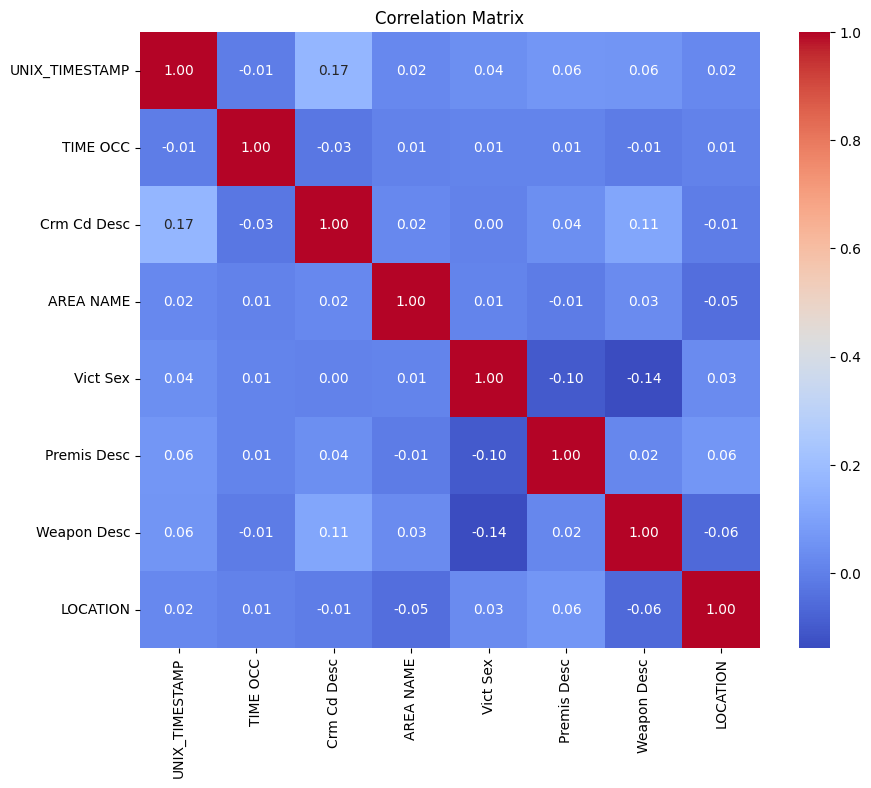

In [16]:
import matplotlib.pyplot as plt

# Assuming 'encoded' is your DataFrame with encoded data
# Compute the correlation matrix
correlation_matrix = encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns if necessary (e.g., 'DR_NO' is just an identifier)
encoded = encoded.drop(columns=['Unnamed: 0', 'DR_NO'], errors='ignore')  

# Normalize data for better clustering (important for features with different scales)
scaler = StandardScaler()
encoded_scaled = scaler.fit_transform(encoded)

# Define the number of clusters
k = 5  # Adjust based on elbow method or domain knowledge

# Apply k-Means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
encoded["Cluster"] = kmeans.fit_predict(encoded_scaled)

# Check results
print(encoded.head())

        UNIX_TIMESTAMP  TIME OCC  Crm Cd Desc  AREA NAME  Vict Sex  \
877323    1.714003e+09      1600           71         16         2   
877324    1.705795e+09      1510            4          6         0   
877326    1.711066e+09      1815            4         16         2   
877328    1.711325e+09      1422           45          6         2   
877333    1.706227e+09      1808            4         17         0   

        Premis Desc  Weapon Desc  LOCATION  Cluster  
877323          206           25      4212        0  
877324           88           59      1803        3  
877326          195           59      4328        2  
877328          155           69      3572        2  
877333          189           69      2466        1  


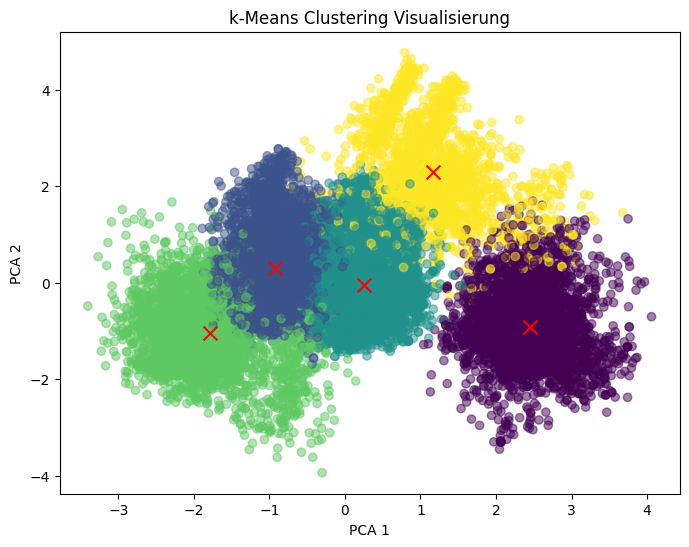

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA zur Dimensionsreduktion (2D)
pca = PCA(n_components=2)
encoded_pca = pca.fit_transform(encoded_scaled)

# Cluster-Zentren transformieren
centers = pca.transform(kmeans.cluster_centers_)

# Scatterplot mit Clustern
plt.figure(figsize=(8, 6))
plt.scatter(encoded_pca[:, 0], encoded_pca[:, 1], c=encoded["Cluster"], cmap="viridis", alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='x')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("k-Means Clustering Visualisierung")
plt.show()